In [1]:
import psi4

In [2]:
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [5]:
import numpy as np

def lj(r, sigma, eps):
    return 4 * eps * ((sigma/r)**12 - (sigma/r)**6)

distances = np.linspace(3.5, 6.0, num=20)
energies = []

psi4.set_options({'freeze_core': True})
for d in distances:
    mol = psi4.geometry(f"""
    Ar
    --
    Ar 1 {d}
    """)

    # psi4.optimize('B3LYP', molecule=mol)
    energy = psi4.energy("ccsd(t)/aug-cc-pvdz", bsse_type='cp', molecule=mol)
    energies.append(energy)


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [12]:
from scipy.optimize import curve_fit
params, params_covariance = curve_fit(lj, distances, energies, p0=[3.5, 0.2])

TypeError: not all arguments converted during string formatting

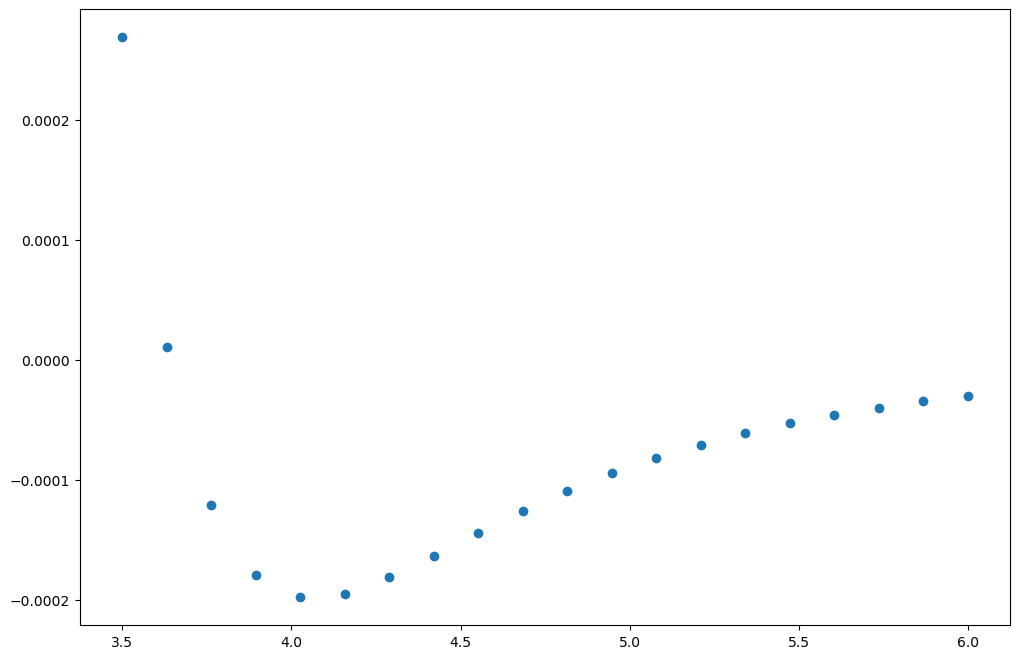

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(distances, energies, label='Computed Energies')
plt.plot(distances, lj(distances, *params), linestyle='solid', color='red',
         label='LJ Fit' % tuple(params))
plt.xlabel('Distance in A',fontsize=15)
plt.ylabel('Energy in au',fontsize=15)
plt.legend()
plt.title('Energy vs. Distance',fontsize=20)

plt.savefig('argon_ene_surface.pdf',format='pdf')
plt.show()